In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('hospital_readmissions.csv')
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             1000 non-null   int64 
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Admission_Type         1000 non-null   object
 4   Diagnosis              1000 non-null   object
 5   Num_Lab_Procedures     1000 non-null   int64 
 6   Num_Medications        1000 non-null   int64 
 7   Num_Outpatient_Visits  1000 non-null   int64 
 8   Num_Inpatient_Visits   1000 non-null   int64 
 9   Num_Emergency_Visits   1000 non-null   int64 
 10  Num_Diagnoses          1000 non-null   int64 
 11  A1C_Result             566 non-null    object
 12  Readmitted             1000 non-null   object
dtypes: int64(8), object(5)
memory usage: 101.7+ KB


#### Distribution of target column

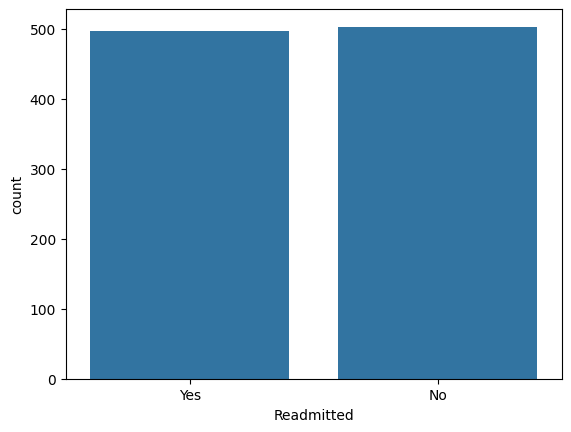

In [4]:
import seaborn as sns

ax = sns.countplot(x = 'Readmitted', data = df)

In [5]:
readmit_distri = df['Readmitted'].value_counts()
print(readmit_distri)

Readmitted
No     503
Yes    497
Name: count, dtype: int64


In [6]:
df_1 = df[[ 'Age', 'Gender', 'Admission_Type', 'Diagnosis','Num_Lab_Procedures' ,'Num_Medications','Num_Outpatient_Visits','Num_Inpatient_Visits',
          'Num_Emergency_Visits','Num_Diagnoses','Readmitted']]
df_1.head()

,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,Readmitted
0,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,Yes
1,32,Female,Urgent,Diabetes,81,10,4,4,1,6,No
2,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,No
3,38,Male,Elective,Diabetes,77,11,2,3,4,9,Yes
4,41,Female,Urgent,Diabetes,50,25,3,4,1,3,Yes


#### Distribution of categorical data

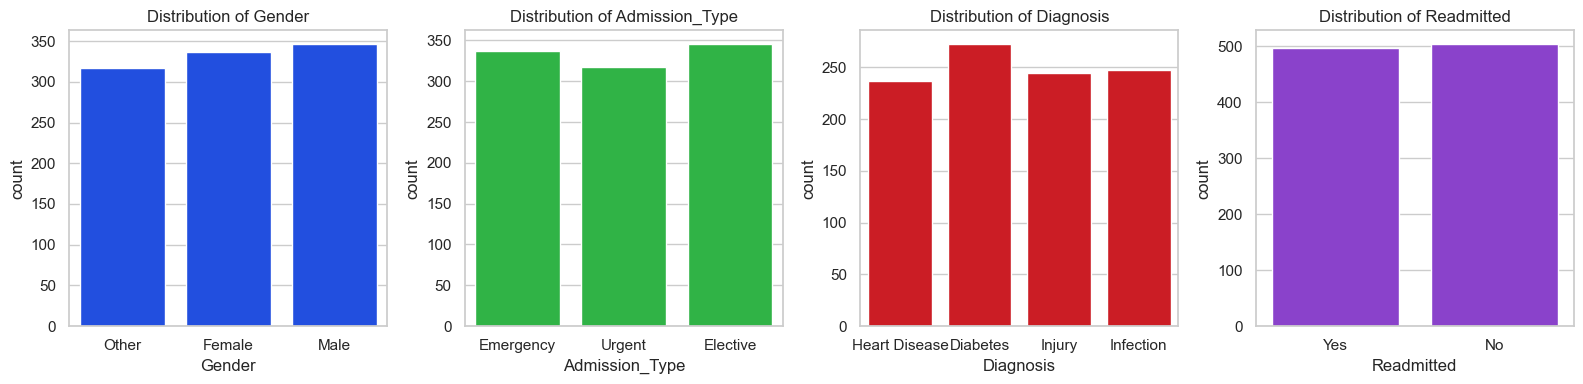

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

fig,axes = plt.subplots(1,4,figsize= (16,4))

sns.countplot(x='Gender', data = df_1, ax=axes[0],color=sns.color_palette('bright')[0])
axes[0].set_title('Distribution of Gender')

sns.countplot(x='Admission_Type', data = df_1, ax=axes[1],color=sns.color_palette('bright')[2])
axes[1].set_title('Distribution of Admission_Type')

sns.countplot(x='Diagnosis', data = df_1, ax=axes[2],color=sns.color_palette('bright')[3])
axes[2].set_title('Distribution of Diagnosis')

sns.countplot(x='Readmitted', data = df_1, ax=axes[3],color=sns.color_palette('bright')[4])
axes[3].set_title('Distribution of Readmitted')

plt.tight_layout()
plt.show()

#### Distribution of features with target column

<Figure size 600x600 with 0 Axes>

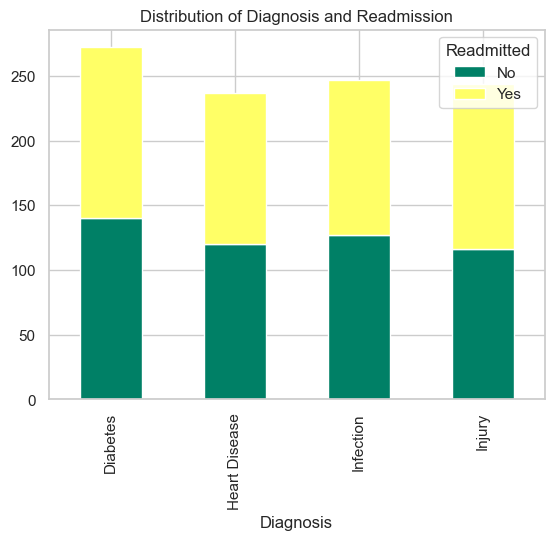

In [8]:
# Stacked bar chart for 'Diagnosis' and 'Readmitted'
plt.figure(figsize=(6, 6))
df_1.groupby(['Diagnosis', 'Readmitted']).size().unstack().plot(kind='bar', stacked=True, colormap='summer')
plt.title('Distribution of Diagnosis and Readmission')
plt.show()


<Figure size 600x600 with 0 Axes>

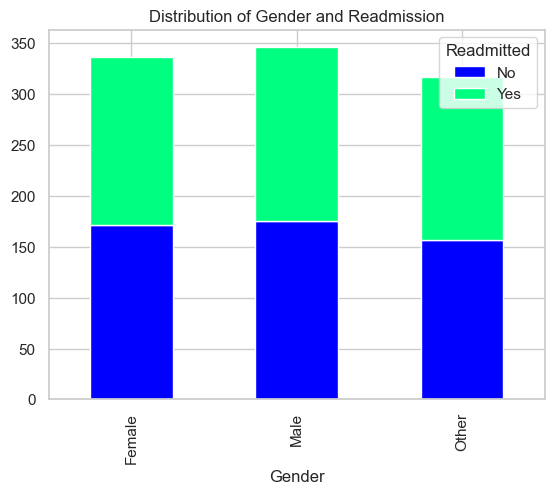

In [9]:
# Stacked bar chart for 'Gender' and 'Readmitted'
plt.figure(figsize=(6, 6))
df_1.groupby(['Gender', 'Readmitted']).size().unstack().plot(kind='bar', stacked=True, colormap='winter')
plt.title('Distribution of Gender and Readmission')
plt.show()

<Figure size 600x600 with 0 Axes>

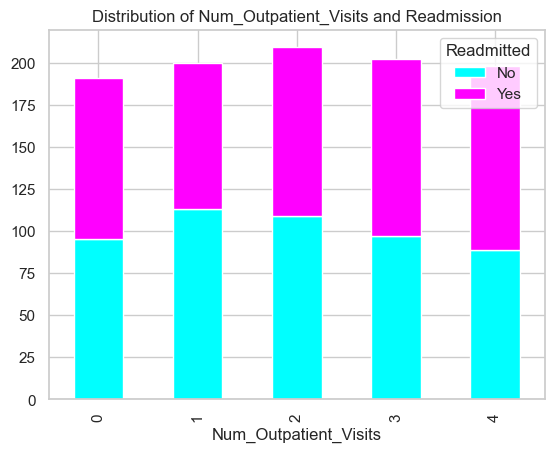

In [10]:
# Stacked bar chart for 'Num_Outpatient_Visits' and 'Readmitted'
plt.figure(figsize=(6, 6))
df_1.groupby(['Num_Outpatient_Visits', 'Readmitted']).size().unstack().plot(kind='bar', stacked=True, colormap='cool')
plt.title('Distribution of Num_Outpatient_Visits and Readmission')
plt.show()

#### Conversion of categorical data into numeric data

In [11]:
# label encoding for gender

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_1['Gender_encoded'] = label_encoder.fit_transform(df_1['Gender'])

# Get gender unique values and their corresponding encoded values

unique_labels = label_encoder.classes_
encoded_values = label_encoder.transform(unique_labels)
print({'original': unique_labels,'encoded':encoded_values})


{'original': array(['Female', 'Male', 'Other'], dtype=object), 'encoded': array([0, 1, 2])}


C:\Users\Parthi\AppData\Local\Temp\ipykernel_9704\1710921713.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Gender_encoded'] = label_encoder.fit_transform(df_1['Gender'])


In [12]:
# label encoding for readmitted

label_encoder = LabelEncoder()
df_1['Readmitted_encoded'] = label_encoder.fit_transform(df_1['Readmitted'])

# Get readmitted unique values and their corresponding encoded values

unique_labels = label_encoder.classes_
encoded_values = label_encoder.transform(unique_labels)
print({'original': unique_labels,'encoded':encoded_values})

{'original': array(['No', 'Yes'], dtype=object), 'encoded': array([0, 1])}


In [13]:
# label encoding for Admission_Type

label_encoder = LabelEncoder()
df_1['Admission_Type_encoded'] = label_encoder.fit_transform(df_1['Admission_Type'])

# Get Admission_Type unique values and their corresponding encoded values

unique_labels = label_encoder.classes_
encoded_values = label_encoder.transform(unique_labels)
print({'original': unique_labels,'encoded':encoded_values})

{'original': array(['Elective', 'Emergency', 'Urgent'], dtype=object), 'encoded': array([0, 1, 2])}


In [14]:
# label encoding for Diagnosis

label_encoder = LabelEncoder()
df_1['Diagnosis_encoded'] = label_encoder.fit_transform(df_1['Diagnosis'])

# Get Diagnosis unique values and their corresponding encoded values

unique_labels = label_encoder.classes_
encoded_values = label_encoder.transform(unique_labels)
print({'original': unique_labels,'encoded':encoded_values})

{'original': array(['Diabetes', 'Heart Disease', 'Infection', 'Injury'], dtype=object), 'encoded': array([0, 1, 2, 3])}


#### created new dataframe after encoding

In [15]:
df_encoded = df_1[['Age','Gender_encoded','Readmitted_encoded','Admission_Type_encoded','Diagnosis_encoded','Num_Medications',
                   'Num_Lab_Procedures','Num_Outpatient_Visits','Num_Inpatient_Visits','Num_Emergency_Visits','Num_Diagnoses']]

In [16]:
df_encoded.head()

,Age,Gender_encoded,Readmitted_encoded,Admission_Type_encoded,Diagnosis_encoded,Num_Medications,Num_Lab_Procedures,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses
0,69,2,1,1,1,2,33,4,1,1,5
1,32,0,0,2,0,10,81,4,4,1,6
2,78,0,0,2,1,29,75,4,0,3,5
3,38,1,1,0,0,11,77,2,3,4,9
4,41,0,1,2,0,25,50,3,4,1,3


#### Visualizations of features

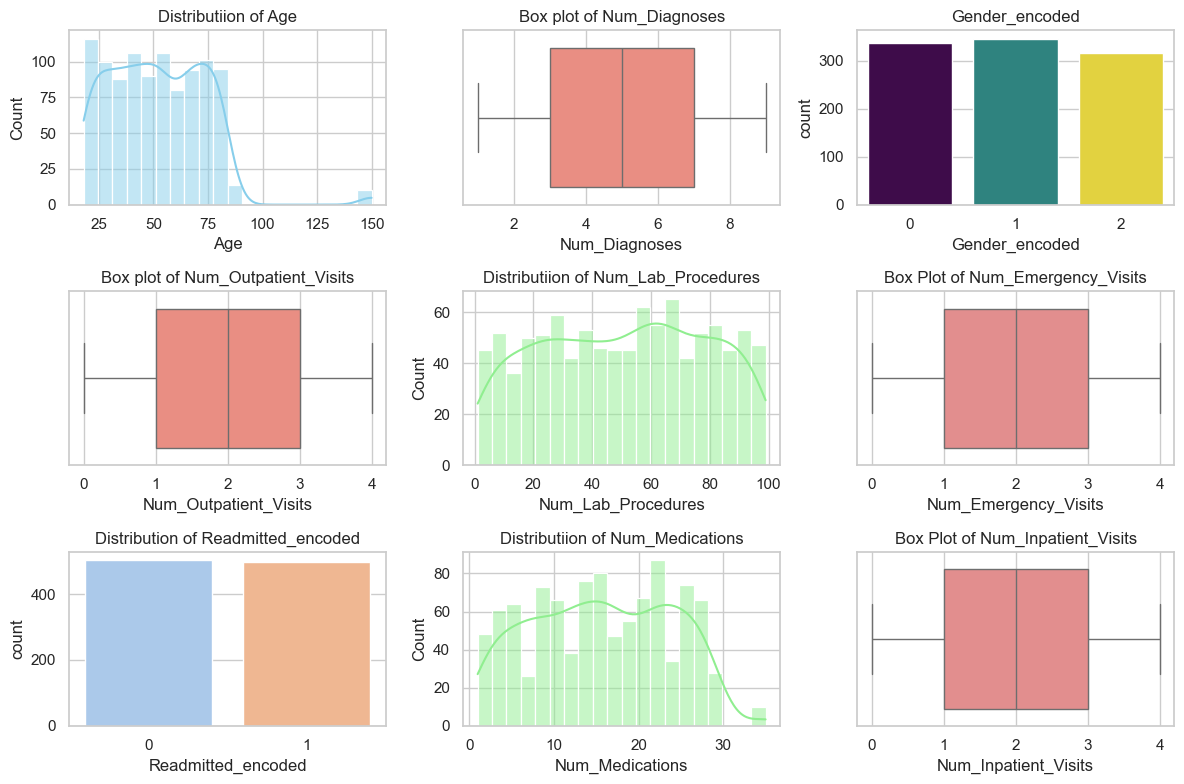

In [17]:
# Distribution of Individual Features
plt.figure(figsize=(12, 8))

# Histogram for Age

plt.subplot(3,3,1)
sns.histplot(df_encoded['Age'],bins=20,kde=True,color='skyblue')
plt.title('Distributiion of Age')

# Box plot for Num_Diagnoses             

plt.subplot(3,3,2)
sns.boxplot(x='Num_Diagnoses',data= df_encoded,color='salmon')
plt.title('Box plot of Num_Diagnoses')

# Count plot for Gender_encoded

plt.subplot(3,3,3)
sns.countplot(x ='Gender_encoded', data = df_encoded, palette='viridis',hue='Gender_encoded',legend=False)
plt.title('Gender_encoded')

# Box plot for Num_Outpatient_Visits             

plt.subplot(3,3,4)
sns.boxplot(x='Num_Outpatient_Visits',data= df_encoded,color='salmon')
plt.title('Box plot of Num_Outpatient_Visits')

# Histogram for Num_Lab_Procedures

plt.subplot(3,3,5)
sns.histplot(df_encoded['Num_Lab_Procedures'],bins=20,kde=True,color='lightgreen')
plt.title('Distributiion of Num_Lab_Procedures')

# Box plot for 'Num_Emergency_Visits'
plt.subplot(3, 3, 6)
sns.boxplot(x='Num_Emergency_Visits', data=df_encoded, color='lightcoral')
plt.title('Box Plot of Num_Emergency_Visits')

# Count plot for 'Readmitted_encoded'
plt.subplot(3, 3, 7)
sns.countplot(x='Readmitted_encoded', data=df_encoded, palette='pastel',hue='Readmitted_encoded',legend=False)
plt.title('Distribution of Readmitted_encoded')

# Histogram for Num_Medications

plt.subplot(3,3,8)
sns.histplot(df_encoded['Num_Medications'],bins=20,kde=True,color='lightgreen')
plt.title('Distributiion of Num_Medications')

# Box plot for 'Num_Inpatient_Visits'
plt.subplot(3, 3, 9)
sns.boxplot(x='Num_Inpatient_Visits', data=df_encoded, color='lightcoral')
plt.title('Box Plot of Num_Inpatient_Visits')

plt.tight_layout()
plt.show()

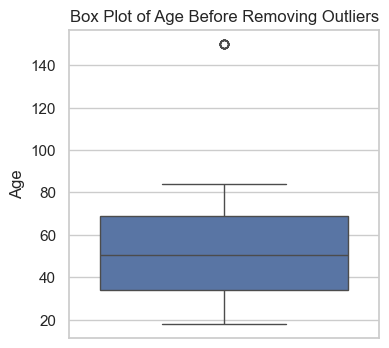

In [18]:
plt.figure(figsize=(4, 4))
sns.boxplot(df_encoded['Age'])
plt.title('Box Plot of Age Before Removing Outliers')
plt.show()

In [19]:
# Filling missing values with the mean
df_encoded['Age'] = df_encoded['Age'].fillna(df_encoded['Age'].mean())

# Calculate quartiles
Q1 = df_encoded['Age'].quantile(0.25)
Q3 = df_encoded['Age'].quantile(0.75)

# Define IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df_no_outliers = df_encoded[(df_encoded['Age'] >= lower_bound) & (df_encoded['Age'] <= upper_bound)]

C:\Users\Parthi\AppData\Local\Temp\ipykernel_9704\1099176202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['Age'] = df_encoded['Age'].fillna(df_encoded['Age'].mean())


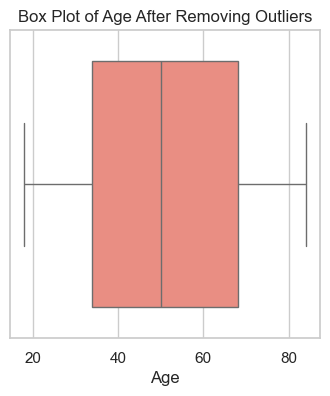

In [20]:
plt.figure(figsize=(4,4))
sns.boxplot(x=df_no_outliers['Age'], color='salmon')
plt.title('Box Plot of Age After Removing Outliers')
plt.show()

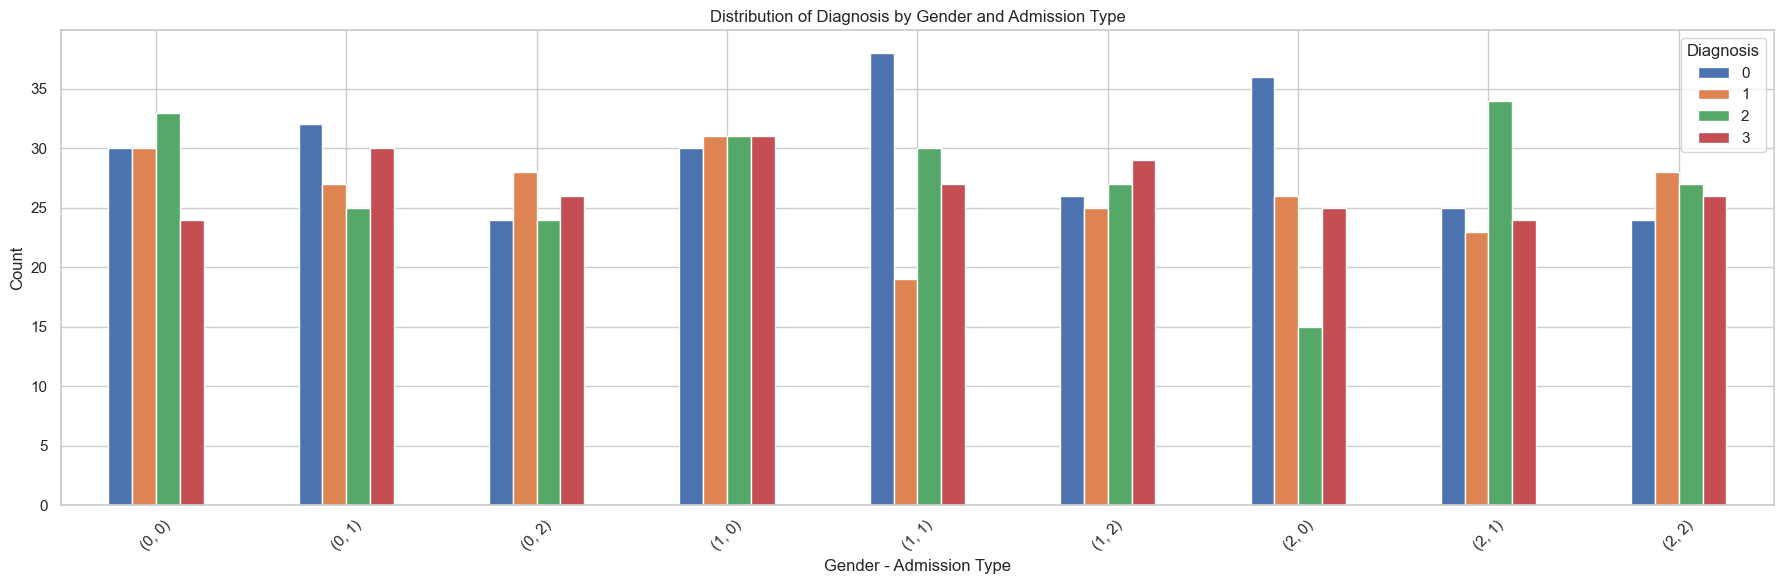

In [110]:
# Group data by 'Gender' and 'Admission_Type', and count occurrences of each diagnosis

grouped_data = df_no_outliers.groupby(['Gender_encoded', 'Admission_Type_encoded', 'Diagnosis_encoded']).size().unstack(fill_value=0)

# Plot grouped bar chart
grouped_data.plot(kind='bar', figsize=(18, 6))
plt.title('Distribution of Diagnosis by Gender and Admission Type')
plt.xlabel('Gender - Admission Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()


In [21]:
df_no_outliers.head()

,Age,Gender_encoded,Readmitted_encoded,Admission_Type_encoded,Diagnosis_encoded,Num_Medications,Num_Lab_Procedures,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses
0,69,2,1,1,1,2,33,4,1,1,5
1,32,0,0,2,0,10,81,4,4,1,6
2,78,0,0,2,1,29,75,4,0,3,5
3,38,1,1,0,0,11,77,2,3,4,9
4,41,0,1,2,0,25,50,3,4,1,3


In [22]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     990 non-null    int64
 1   Gender_encoded          990 non-null    int32
 2   Readmitted_encoded      990 non-null    int32
 3   Admission_Type_encoded  990 non-null    int32
 4   Diagnosis_encoded       990 non-null    int32
 5   Num_Medications         990 non-null    int64
 6   Num_Lab_Procedures      990 non-null    int64
 7   Num_Outpatient_Visits   990 non-null    int64
 8   Num_Inpatient_Visits    990 non-null    int64
 9   Num_Emergency_Visits    990 non-null    int64
 10  Num_Diagnoses           990 non-null    int64
dtypes: int32(4), int64(7)
memory usage: 77.3 KB


In [23]:
df_no_outliers.describe()

,Age,Gender_encoded,Readmitted_encoded,Admission_Type_encoded,Diagnosis_encoded,Num_Medications,Num_Lab_Procedures,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,51.665000,0.98000,0.497000,0.973000,1.463000,15.661000,50.836000,2.016000,2.019000,1.956000,5.011000
std,21.989459,0.80886,0.500241,0.814208,1.132216,8.230177,28.075137,1.399894,1.416561,1.409983,2.664203
min,18.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,34.000000,0.00000,0.000000,0.000000,0.000000,9.000000,27.000000,1.000000,1.000000,1.000000,3.000000
50%,50.500000,1.00000,0.000000,1.000000,1.000000,16.000000,52.000000,2.000000,2.000000,2.000000,5.000000
75%,69.000000,2.00000,1.000000,2.000000,2.000000,23.000000,75.000000,3.000000,3.000000,3.000000,7.000000
max,150.000000,2.00000,1.000000,2.000000,3.000000,35.000000,99.000000,4.000000,4.000000,4.000000,9.000000


#### Feature selection

#### Pearson correlation matrix

In [24]:
# Calculate Pearson correlation coefficients
correlation_matrix = df_no_outliers.corr(method='pearson')

# Select the correlations between features and the target variable
correlation_with_target = correlation_matrix['Readmitted_encoded'].abs()

# Sort the correlations in descending order
correlation_with_target_sorted = correlation_with_target.sort_values(ascending=False)

# Select the top correlated features
top_features = correlation_with_target_sorted[1:]  # Excluding the target variable itself

# Print or display the top correlated features

print("Top correlated features:\n", top_features)

Top correlated features:
 Num_Diagnoses             0.063308
Num_Outpatient_Visits     0.050729
Age                       0.031254
Num_Inpatient_Visits      0.028399
Diagnosis_encoded         0.028268
Num_Medications           0.027771
Gender_encoded            0.009654
Num_Lab_Procedures        0.006101
Num_Emergency_Visits      0.001258
Admission_Type_encoded    0.000492
Name: Readmitted_encoded, dtype: float64


#### HeatMap correlation matrix 

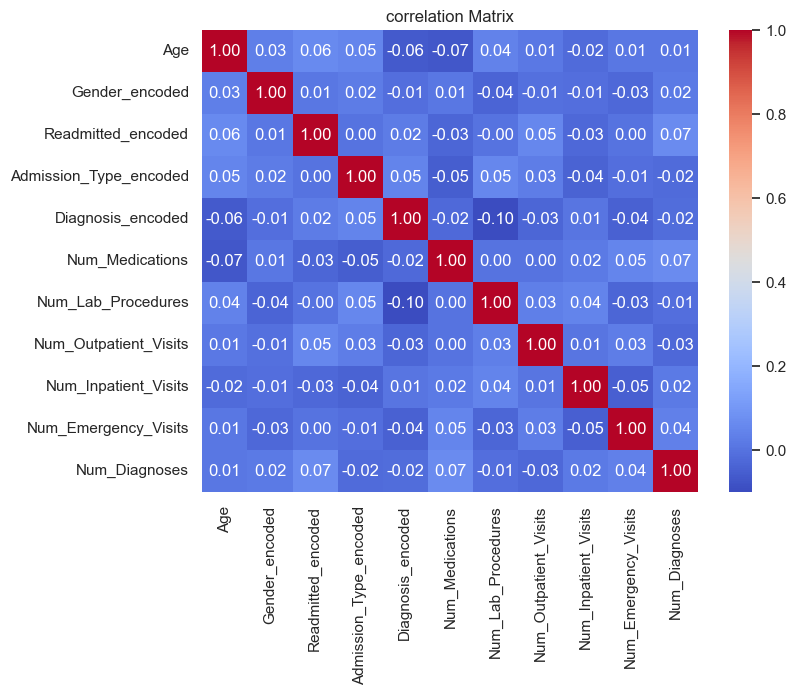

In [25]:
import matplotlib.pyplot as plt

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation Matrix')
plt.show()

#### Visualizations of highly correlated features

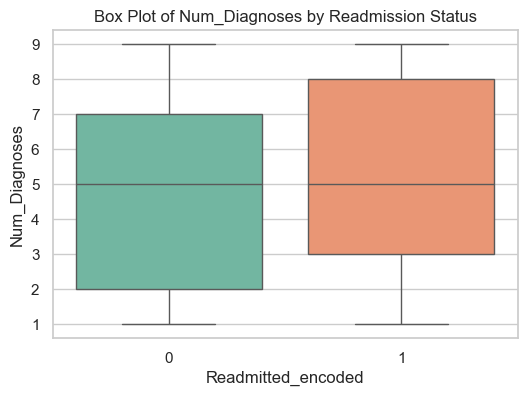

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Readmitted_encoded', y='Num_Diagnoses', data=df_no_outliers, palette='Set2',hue ='Readmitted_encoded',legend=False)
plt.title('Box Plot of Num_Diagnoses by Readmission Status')
plt.show()

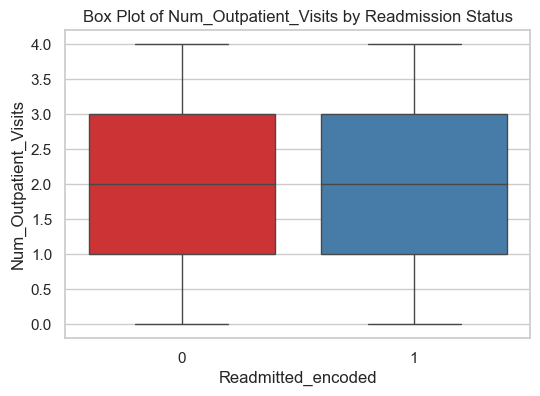

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Readmitted_encoded', y='Num_Outpatient_Visits', data=df_no_outliers, palette='Set1',hue ='Readmitted_encoded',legend=False)
plt.title('Box Plot of Num_Outpatient_Visits by Readmission Status')
plt.show()

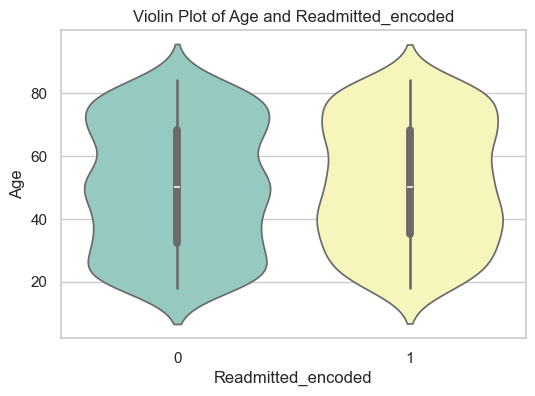

In [28]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=df_no_outliers, x='Readmitted_encoded', y='Age', palette='Set3',hue ='Readmitted_encoded',legend=False)
plt.title('Violin Plot of Age and Readmitted_encoded')
plt.show()


#### correlation matrix for top correlated features

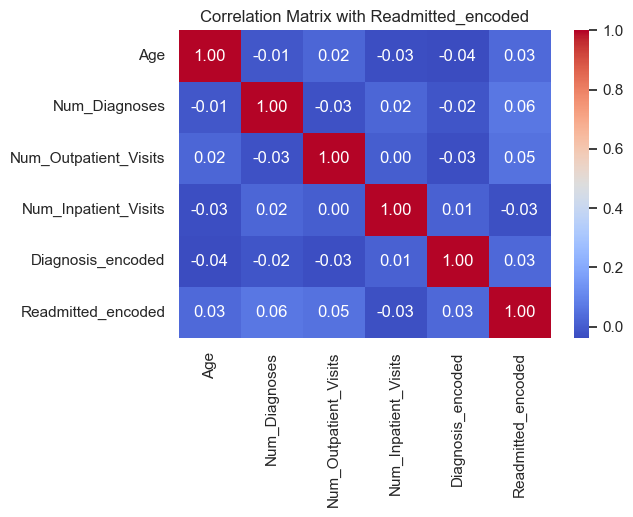

In [29]:
plt.figure(figsize=(6,4))
correlation_matrix = df_no_outliers[['Age', 'Num_Diagnoses','Num_Outpatient_Visits', 'Num_Inpatient_Visits','Diagnosis_encoded','Readmitted_encoded']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix with Readmitted_encoded")
plt.show()

#### Histogram with Kernel Density Estimation for all features

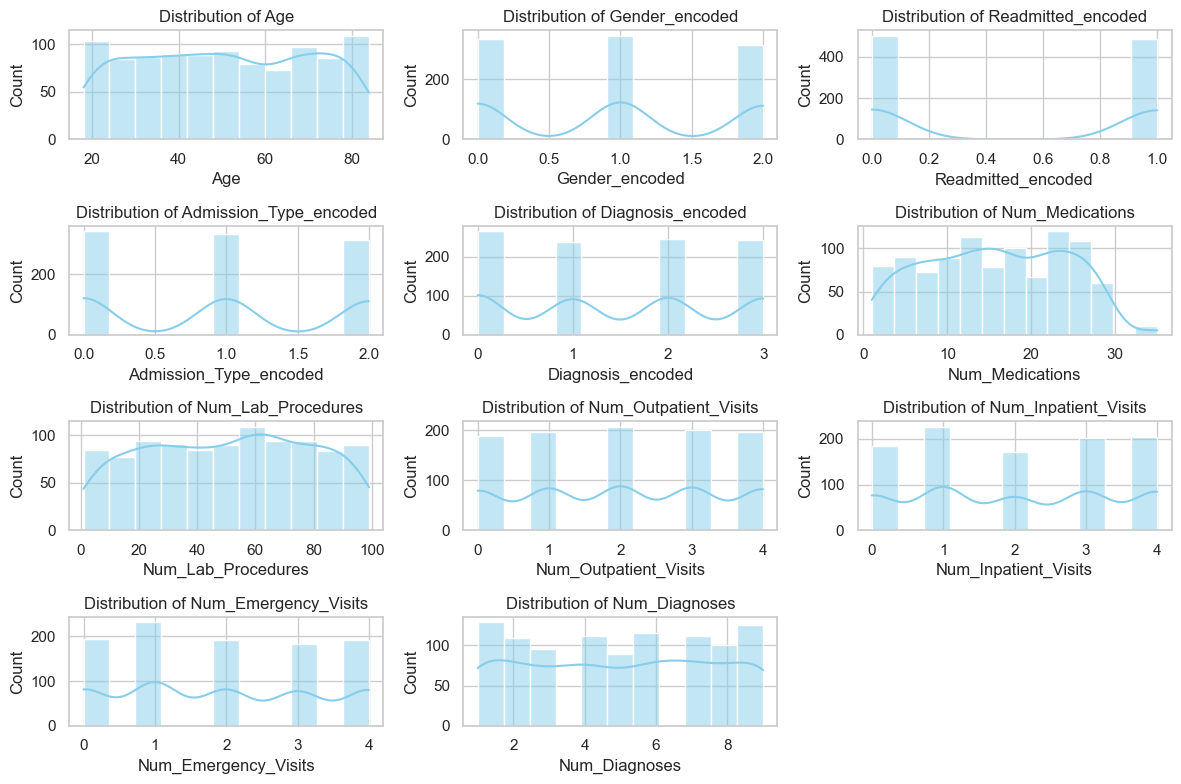

In [30]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_no_outliers.select_dtypes(include='number').columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_no_outliers[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

#### Model Selection

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [89]:
X= df_no_outliers[['Num_Diagnoses','Num_Outpatient_Visits']]
y = df_no_outliers['Readmitted_encoded']

#### Splitting train and test set

In [90]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Decision Tree Classifier

In [91]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [92]:
y_pred = dt_model.predict(X_test)

In [93]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.5151515151515151
Confusion Matrix:
[[59 40]
 [56 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.60      0.55        99
           1       0.52      0.43      0.47        99

    accuracy                           0.52       198
   macro avg       0.52      0.52      0.51       198
weighted avg       0.52      0.52      0.51       198



#### RandomForest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=20,n_estimators=100)
                                  
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=20)

In [95]:
y_pred_rf = rf_model.predict(X_test)

In [96]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.5404040404040404
Confusion Matrix:
[[56 43]
 [48 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.57      0.55        99
           1       0.54      0.52      0.53        99

    accuracy                           0.54       198
   macro avg       0.54      0.54      0.54       198
weighted avg       0.54      0.54      0.54       198



#### Hyperparameter tuning

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [10, 20,30]    
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)


In [73]:
grid_search.best_params_

{'max_depth': 30, 'n_estimators': 300}

In [74]:
# random 
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=rf_model,param_distributions= param_grid)

In [75]:
random_search.fit(X_train,y_train)

c:\Users\Parthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=RandomForestClassifier(max_depth=20),
                   param_distributions={'max_depth': [10, 20, 30],
                                        'n_estimators': [100, 200, 300]})

In [97]:
random_search.best_params_

{'n_estimators': 300, 'max_depth': 20}

#### Support Vector Machine

In [98]:
from sklearn.svm import SVC

# Create and train SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [99]:
y_pred_svm = svm_model.predict(X_test)

In [100]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.5202020202020202
Confusion Matrix:
[[61 38]
 [57 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.62      0.56        99
           1       0.53      0.42      0.47        99

    accuracy                           0.52       198
   macro avg       0.52      0.52      0.52       198
weighted avg       0.52      0.52      0.52       198



#### Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

# Create and train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [102]:
y_pred_lr = lr_model.predict(X_test)

In [103]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
class_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.5252525252525253
Confusion Matrix:
[[57 42]
 [52 47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.58      0.55        99
           1       0.53      0.47      0.50        99

    accuracy                           0.53       198
   macro avg       0.53      0.53      0.52       198
weighted avg       0.53      0.53      0.52       198



#### Consolidated results of the models trained

In [104]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define a dictionary to store results
results = {}

# Define a function to evaluate models and store results
def evaluate_model(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

models_dict = {
    'Logistic Regression': lr_model,
    'Support Vector Machine': svm_model,
    'Random Forest': rf_model,
    'Decision Tree': dt_model
}

for model_name, model in models_dict.items():
    evaluate_model(model, X_test, y_test, model_name)

# Convert results dictionary to a pandas DataFrame
results_df = pd.DataFrame(results).T

# Print the consolidated results table
print(results_df)


                        Accuracy Precision    Recall  F1 Score  \
Logistic Regression     0.525253   0.52809  0.474747       0.5   
Support Vector Machine  0.520202     0.525  0.424242  0.469274   
Random Forest           0.540404  0.542553  0.515152  0.528497   
Decision Tree           0.515152  0.518072  0.434343  0.472527   

                            Confusion Matrix  
Logistic Regression     [[57, 42], [52, 47]]  
Support Vector Machine  [[61, 38], [57, 42]]  
Random Forest           [[56, 43], [48, 51]]  
Decision Tree           [[59, 40], [56, 43]]  
